In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

/Users/Santiago/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
fuel = pd.read_csv('course_data/fuel.csv')
fuel.head(3)

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0


In [3]:
X = fuel.copy()
y = X.pop('FE') # Remove Target

preprocessor = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(), make_column_selector(dtype_include=object)),)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [6]:
model.compile(optimizer='adam',loss='mae',)

In [7]:
history = model.fit(X, y, batch_size=128, epochs=200)
history_df = pd.DataFrame(history.history)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1531  
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0562 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6460 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3572 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2473 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1857 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1520 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1322 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0997 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0898 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0833 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0726 
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0693 
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0665 
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0574 
Epoch 16/200
9/9 ━

<Axes: >

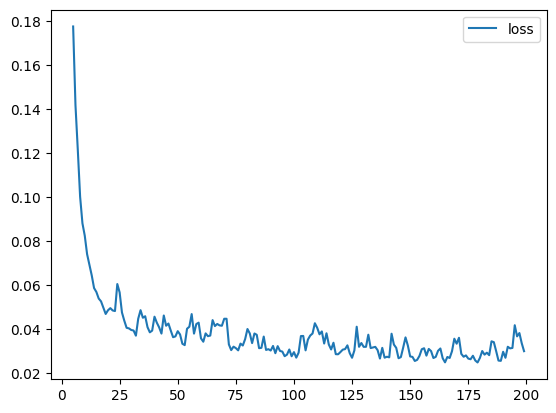

In [8]:
history_df.loc[5:, ['loss']].plot()